In [ ]:
#挂载云盘 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#进入项目目录
!ls
import os
os.chdir('/content/drive/My Drive/colab/信贷数据分析')
!ls

algorithm.ipynb      数据处理.xlsx
data_analysis.ipynb  测试集进项.xlsx
random_forest.ipynb  测试集销项.xlsx
results.csv	     训练集进项.xlsx
test_in.npy	     训练集销项.xlsx
test_out.npy	     附件1：123家有信贷记录企业的相关数据2.xlsx
train_in.npy	     附件1：123家有信贷记录企业的相关数据.xlsx
train_out.npy	     附件2：302家无信贷记录企业的相关数据.xlsx
信贷数据分析.7z
algorithm.ipynb      数据处理.xlsx
data_analysis.ipynb  测试集进项.xlsx
random_forest.ipynb  测试集销项.xlsx
results.csv	     训练集进项.xlsx
test_in.npy	     训练集销项.xlsx
test_out.npy	     附件1：123家有信贷记录企业的相关数据2.xlsx
train_in.npy	     附件1：123家有信贷记录企业的相关数据.xlsx
train_out.npy	     附件2：302家无信贷记录企业的相关数据.xlsx
信贷数据分析.7z


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 读取.npy文件
train_in=np.load("train_in.npy")
train_out=np.load("train_out.npy")
train_x=np.vstack((train_in,train_out))
train_x=train_x.T
#归一化
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())
fujian1=pd.read_excel('附件1：123家有信贷记录企业的相关数据2.xlsx',0)
weiyue=[]#提取违约数据
for i in fujian1['是否违约']:
    if(i=='是'):
        weiyue.append(1)
    else:
        weiyue.append(0)

In [ ]:
train_y=np.array(weiyue)
train=pd.concat([pd.DataFrame(train_x),pd.DataFrame(train_y)],axis=1)
## 下采样
# 计算少数类个数
number_records_is_weiyue = len(train_y[train_y == 1])
def xuhao(train_y,symbol):
    '''
    输入：一列array，一个符号
    输出：该符号对应的位置序号list
    '''
  i=0
  record=[]
  for j in train_y:
    if(j==symbol):
      record.append(i)
    i=i+1
  return record
# 取得少数类样本的索引
is_weiyue_indices = np.array(xuhao(train_y,1))
# 取得多数类样本的索引
normal_indices = np.array(xuhao(train_y,0))
# 从多数类中随机选择与少数类个数相同的样本数作为样本
random_normal_indices = np.random.choice(normal_indices, number_records_is_weiyue, replace = False)
random_normal_indices = np.array(random_normal_indices)
# 合并随机取得的0类和全部的1类的索引
under_sample_indices = np.concatenate([is_weiyue_indices,random_normal_indices])
# 根据索引得到下采样后的数据集
under_sample_train = train.iloc[under_sample_indices,:]
#打乱
from sklearn.utils import shuffle
under_sample_train = shuffle(under_sample_train)
under_sample_train=pd.DataFrame(under_sample_train.values)
under_sample_train#最终的数据集

In [ ]:
#划分训练集和验证集
cut=len(train_y)//10
x_train,y_train,x_val,y_val=under_sample_train.iloc[:-cut,:-1],under_sample_train.iloc[:-cut,-1],under_sample_train.iloc[-cut:,:-1],under_sample_train.iloc[-cut:,-1]
x_train,y_train,x_val,y_val=x_train.values,y_train.values,x_val.values,y_val.values
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(42, 8) (42,) (12, 8) (12,)


In [ ]:
def result(train_data,train_labels,test_data,test_labels,model):
    model.fit(train_data,train_labels)
    predict_target=model.predict(train_data)
    #在训练集上的预测效果,
    print("训练集:")
    print("预测正确数量,训练集样本量:")
    print(sum(predict_target == train_labels),len(train_labels))
    print("精确度等指标：")
    print(metrics.classification_report(train_labels,predict_target))
    print("混淆矩阵：")
    print(metrics.confusion_matrix(train_labels,predict_target))

    print("在训练集上的预测效果:")
    plt.plot(train_labels[:]) 
    plt.plot(predict_target[:],'o')
    plt.legend(('y_train','y_predict'))
    plt.title('train')
    plt.show()

    #在验证集上的预测效果

    print("验证集:")
    predict_target2=model.predict(test_data)
    print("预测正确数量,验证集样本量:")
    print(sum(predict_target2 == test_labels),len(test_labels))
    print("精确度等指标：")
    print(metrics.classification_report(test_labels,predict_target2))
    print("混淆矩阵：")
    print(metrics.confusion_matrix(test_labels,predict_target2))

    print("在验证集上的预测效果:")
    plt.plot(test_labels) 
    plt.plot(predict_target2,'o')
    plt.legend(('y_test','y_predict'))
    plt.title('test')
    plt.show()

训练集:
预测正确数量,训练集样本量:
38 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        22
         1.0       0.94      0.85      0.89        20

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42

混淆矩阵：
[[21  1]
 [ 3 17]]
在训练集上的预测效果:


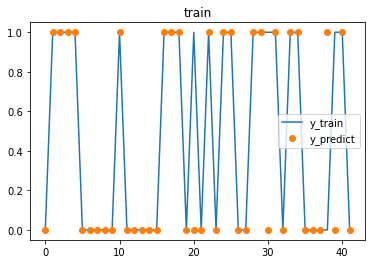

验证集:
预测正确数量,测试集样本量:
10 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.78      1.00      0.88         7

    accuracy                           0.83        12
   macro avg       0.89      0.80      0.81        12
weighted avg       0.87      0.83      0.82        12

混淆矩阵：
[[3 2]
 [0 7]]
在验证集上的预测效果:


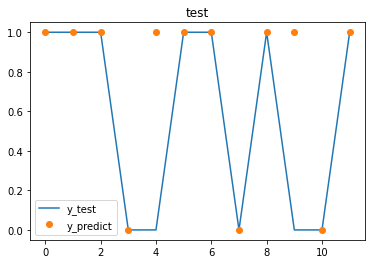

In [ ]:
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier(max_depth=2, random_state=0)
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
42 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

混淆矩阵：
[[22  0]
 [ 0 20]]
在训练集上的预测效果:


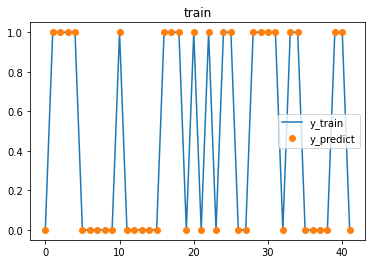

验证集:
预测正确数量,测试集样本量:
8 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12

混淆矩阵：
[[4 1]
 [3 4]]
在验证集上的预测效果:


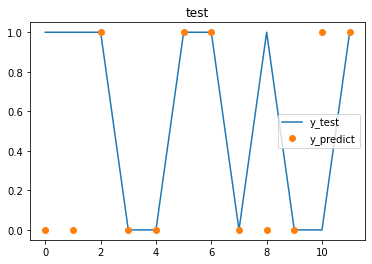

In [ ]:
#使用adaboost分类算法
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
36 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        22
         1.0       0.89      0.80      0.84        20

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42

混淆矩阵：
[[20  2]
 [ 4 16]]
在训练集上的预测效果:


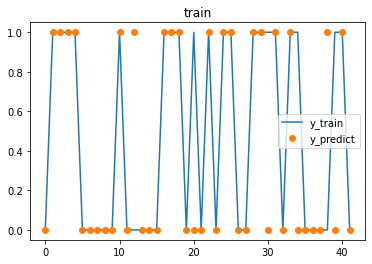

验证集:
预测正确数量,测试集样本量:
9 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57         5
         1.0       0.70      1.00      0.82         7

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12

混淆矩阵：
[[2 3]
 [0 7]]
在验证集上的预测效果:


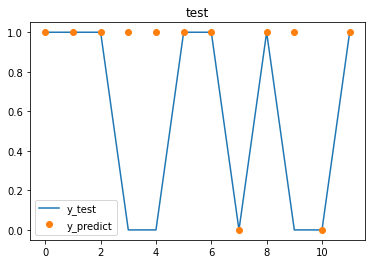

In [ ]:
#knn k近邻分类算法
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
22 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69        22
         1.0       0.00      0.00      0.00        20

    accuracy                           0.52        42
   macro avg       0.26      0.50      0.34        42
weighted avg       0.27      0.52      0.36        42

混淆矩阵：
[[22  0]
 [20  0]]
在训练集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


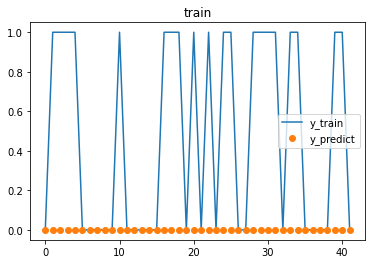

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


验证集:
预测正确数量,测试集样本量:
5 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

混淆矩阵：
[[5 0]
 [7 0]]
在验证集上的预测效果:


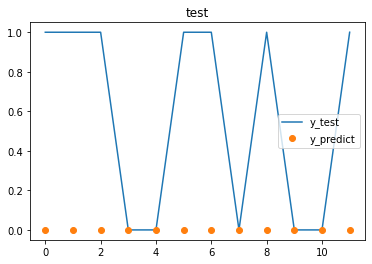

In [ ]:
#神经网络分类方法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
22 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69        22
         1.0       0.00      0.00      0.00        20

    accuracy                           0.52        42
   macro avg       0.26      0.50      0.34        42
weighted avg       0.27      0.52      0.36        42

混淆矩阵：
[[22  0]
 [20  0]]
在训练集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


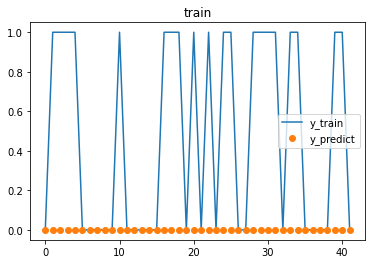

验证集:
预测正确数量,测试集样本量:
5 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

混淆矩阵：
[[5 0]
 [7 0]]
在验证集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


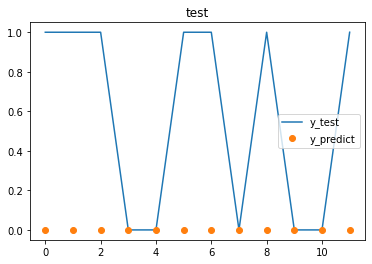

In [ ]:
# 支持向量机SVM
from sklearn.svm import SVC  
model = SVC(gamma='auto') 
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
22 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69        22
         1.0       0.00      0.00      0.00        20

    accuracy                           0.52        42
   macro avg       0.26      0.50      0.34        42
weighted avg       0.27      0.52      0.36        42

混淆矩阵：
[[22  0]
 [20  0]]
在训练集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


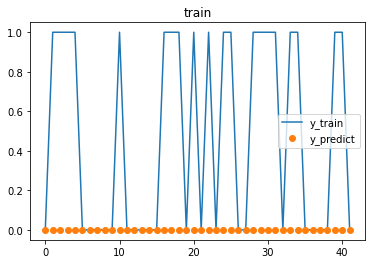

验证集:
预测正确数量,测试集样本量:
5 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

混淆矩阵：
[[5 0]
 [7 0]]
在验证集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


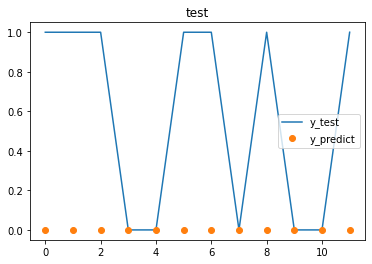

In [ ]:
#线性支持向量机SVM
from sklearn.svm import LinearSVC
model = LinearSVC() 
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
42 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

混淆矩阵：
[[22  0]
 [ 0 20]]
在训练集上的预测效果:


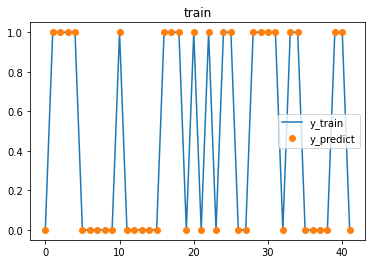

验证集:
预测正确数量,测试集样本量:
10 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83         5
         1.0       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

混淆矩阵：
[[5 0]
 [2 5]]
在验证集上的预测效果:


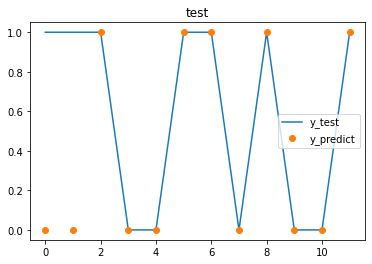

In [ ]:
#决策树方法
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model=DecisionTreeClassifier()
result(x_train,y_train,x_val,y_val,model)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


训练集:
预测正确数量,训练集样本量:
32 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72        22
         1.0       0.68      0.95      0.79        20

    accuracy                           0.76        42
   macro avg       0.80      0.77      0.76        42
weighted avg       0.81      0.76      0.76        42

混淆矩阵：
[[13  9]
 [ 1 19]]
在训练集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


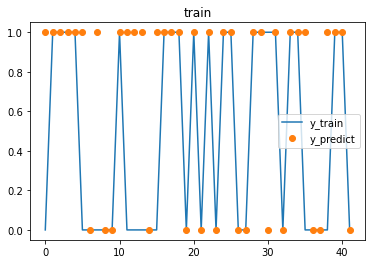

验证集:
预测正确数量,测试集样本量:
8 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.64      1.00      0.78         7

    accuracy                           0.67        12
   macro avg       0.82      0.60      0.56        12
weighted avg       0.79      0.67      0.59        12

混淆矩阵：
[[1 4]
 [0 7]]
在验证集上的预测效果:


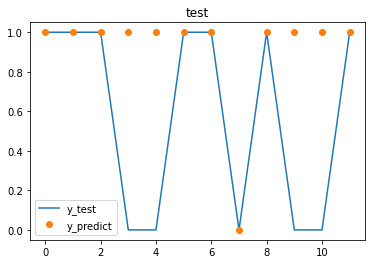

In [ ]:
#使用bagging的集成策略分类 元分类器是感知机
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=MLPClassifier(),
                        n_estimators=10, random_state=0)
result(x_train,y_train,x_val,y_val,model)

训练集:
预测正确数量,训练集样本量:
22 42
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69        22
         1.0       0.00      0.00      0.00        20

    accuracy                           0.52        42
   macro avg       0.26      0.50      0.34        42
weighted avg       0.27      0.52      0.36        42

混淆矩阵：
[[22  0]
 [20  0]]
在训练集上的预测效果:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


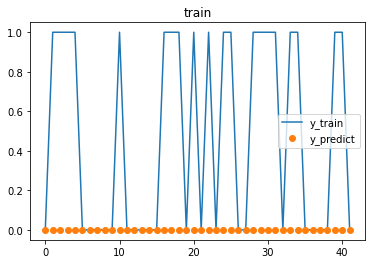

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


验证集:
预测正确数量,测试集样本量:
5 12
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

混淆矩阵：
[[5 0]
 [7 0]]
在验证集上的预测效果:


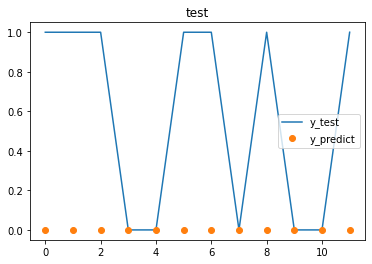

In [ ]:
#logistic回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,l1_ratio=1)
result(x_train,y_train,x_val,y_val,model)

In [ ]:
#读取测试集
test_in=np.load("test_in.npy")
test_out=np.load("test_out.npy")
test_x=np.vstack((test_in,test_out))
test_x=test_x.T
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train,y_train)
predict=model.predict(test_x)
predict_prob=model.predict_proba(test_x)[:,1]
feature_important=model.feature_importances_

In [ ]:
print('预测结果',predict)
print('预测概率',predict_prob)
print('特征重要程度',feature_important)

预测结果 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
预测概率 [0.04342878 0.04342878 0.04342878 0.03933209 0.04342878 0.04342878
 0.